In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from src.sampling.uv_sampling import spider_sampling
from src.operators.measurement import NUFFT_op

In [3]:
Nd, Kd, Jd = (256,256), (512,512), (6,6)

In [90]:
uv = spider_sampling()

In [98]:
uv = np.vstack((-uv, uv))

In [47]:
uv.shape

(8880, 2)

In [99]:
op = NUFFT_op()
op.plan(uv, Nd, Kd, Jd)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8880/8880 [00:03<00:00, 2573.80it/s]


In [77]:
n=20
noise = np.random.normal(size=(n,len(uv))) + np.random.normal(size=(n,len(uv))) *1j

In [78]:
%time
im = op.adj_op(noise) #* 1/np.linalg.norm(uv, axis=1))

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.2 µs


In [100]:
%%time
psf = op.adj_op(np.ones(len(uv)))
# psf = op.adj_op(op.dir_op(np.ones(Nd)))

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 135 ms


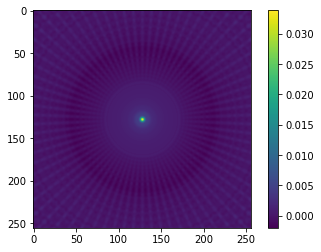

In [101]:
plt.imshow(psf.real)
plt.colorbar()

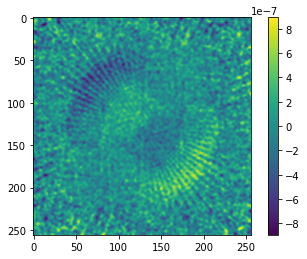

In [102]:
plt.imshow(psf.imag)
plt.colorbar()

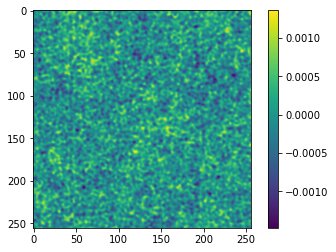

In [85]:
plt.imshow(im[0].real)
plt.colorbar()

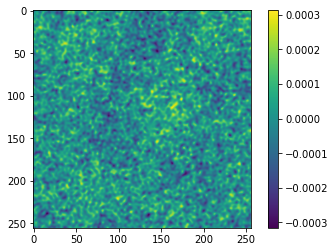

In [86]:
plt.imshow(np.mean(im.real, axis=0))
plt.colorbar()

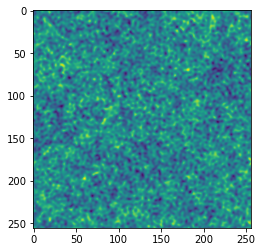

In [61]:
plt.imshow(np.mean(im.imag, axis=0))